<a href="https://colab.research.google.com/github/R4skex/CompParalela/blob/main/Projeto_N2_NoticiasEsporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Colab do Projeto Semestral - Classificador de notícias de esporte com IA**
---

Atenção, podem ser que nem todas as tarefas sejam executadas no Colab (a aplicação por exemplo, pode estar hospedada no streamlit cloud). Mas a maior parte pode estar aqui ou ao menos indicada e comentada.


Além disso a entrega deve incluir:

1. **Um GitHub público do projeto**
2. **Código completo e executável em um notebook Python (este template)**
3. **Uma aplicação streamlit para consumo do modelo**
4. **Um texto/artigo do projeto**
5. **Um vídeo (link YouTube ou outro) de no máximo 3min de apresentação do projeto**

Um **`readme.md`** no GitHub público do projeto deve indicar (um índice) cada uma dessas entregas.








In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '10223349, Daniel Reis Raske' #@param {type:"string"}
Aluno2 = '10400734, Eduardo Marui de Camargo' #@param {type:"string"}
Aluno3 = '10403378, Victor Vergara Marques de Oliveira' #@param {type:"string"}
Aluno4 = '10204809, Vitor dos Santos Souza' #@param {type:"string"}
Aluno5 = '10402674, João Vitor Tortorello' #@param {type:"string"}



In [ ]:
#@title Assinale aqui a sua opção de Projeto
Projeto = "IA Aplicada a Documentos: Uso de Grandes Modelos de Linguagem Abertos" #@param ["IA Aplicada a Imagens: Uso de Modelos de Redes Neurais", "IA Aplicada a Documentos: Uso de Grandes Modelos de Linguagem Abertos"]




# **Resumo**

## 1. Objetivo do Projeto

Este projeto tem como objetivo desenvolver um sistema de classificação automática de notícias de futebol em português, utilizando técnicas de Processamento de Linguagem Natural (NLP) e Aprendizado de Máquina. O sistema é capaz de categorizar as notícias em quatro categorias principais:

- **Resultados**: Notícias sobre jogos, placares e resultados de partidas
- **Transferências**: Notícias sobre negociações, contratações e vendas de jogadores
- **Lesões**: Notícias sobre condições físicas, recuperações e ausências de jogadores
- **Táticas**: Notícias sobre estratégias, formações e preparação das equipes

## 2. Fontes dos Dados

Os dados são coletados automaticamente de três principais portais de notícias esportivas brasileiros:

- GE (Globo Esporte)
- UOL Esporte
- ESPN
- EXAME

O coletor de notícias é desenvolvido para extrair automaticamente títulos, resumos e URLs das notícias mais recentes de cada fonte, garantindo uma base de dados diversificada e atualizada.

## 3. Ferramentas e Tecnologias

Para o desenvolvimento do projeto, são utilizadas as seguintes tecnologias:

- **Processamento de Texto**:
  - spaCy (modelo pt_core_news_lg) para processamento de linguagem natural em português
  - NLTK para pré-processamento de texto

- **Modelo de Classificação**:
  - BERT (Bidirectional Encoder Representations from Transformers)
  - Modelo base: neuralmind/bert-base-portuguese-cased
  - Fine-tuning para classificação de notícias

- **Frameworks e Bibliotecas**:
  - PyTorch para implementação do modelo
  - Transformers (Hugging Face) para acesso ao modelo BERT
  - Pandas e NumPy para manipulação de dados
  - Scikit-learn para avaliação do modelo
  - Streamlit para interface de usuário

## 4. Resultados Preliminares

O sistema desenvolvido apresenta as seguintes características:

- **Coleta Automática**: Sistema capaz de coletar notícias em tempo real das principais fontes
- **Pré-processamento Robusto**: Tratamento adequado de textos em português, incluindo remoção de stopwords e lematização
- **Classificação Multiclasse**: Modelo capaz de categorizar notícias em quatro categorias distintas
- **Interface Web**: Aplicação Streamlit para fácil consumo do modelo

O modelo é treinado com um conjunto de dados balanceado e avaliado usando métricas de classificação multiclasse, demonstrando boa capacidade de generalização e precisão na categorização das notícias.

A implementação final permite não apenas a classificação automática de notícias, mas também oferece insights sobre a distribuição de categorias ao longo do tempo, facilitando a análise de tendências no jornalismo esportivo brasileiro.

# **Apresentação dos dados**

## Exemplos de Notícias Coletadas

Para demonstrar o funcionamento do coletor de notícias, vamos mostrar alguns exemplos de notícias coletadas de cada fonte:

```python
# Exemplo de código para visualizar as notícias coletadas
import pandas as pd

# Carrega os dados coletados
df = pd.read_csv('data/raw/collected_news.csv')

# Mostra exemplos de cada fonte
print("Exemplos de notícias do GE:")
print(df[df['source'] == 'ge'][['title', 'summary']].head(2))
print("\nExemplos de notícias do UOL:")
print(df[df['source'] == 'uol'][['title', 'summary']].head(2))
print("\nExemplos de notícias do ESPN:")
print(df[df['source'] == 'ESPN'][['title', 'summary']].head(2))
print("\nExemplos de notícias do EXAME:")
print(df[df['source'] == 'EXAME'][['title', 'summary']].head(2))
```

## Estatísticas Básicas da Coleta

```python
# Análise da distribuição por fonte
print("Distribuição de notícias por fonte:")
print(df['source'].value_counts())

# Análise do tamanho dos textos
df['text_length'] = df['title'].str.len() + df['summary'].str.len()
print("\nEstatísticas do tamanho dos textos:")
print(df['text_length'].describe())
```

## Visualização da Distribuição

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo
plt.style.use('seaborn')
sns.set_palette('husl')

# Gráfico de barras da distribuição por fonte
plt.figure(figsize=(10, 6))
df['source'].value_counts().plot(kind='bar')
plt.title('Distribuição de Notícias por Fonte')
plt.xlabel('Fonte')
plt.ylabel('Quantidade de Notícias')
plt.show()

# Histograma do tamanho dos textos
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=30)
plt.title('Distribuição do Tamanho dos Textos')
plt.xlabel('Tamanho do Texto (caracteres)')
plt.ylabel('Frequência')
plt.show()
```

## Características dos Dados

1. **Fontes Diversificadas**:
   - GE (Globo Esporte)
   - UOL Esporte
   - ESPN
   - EXAME

2. **Estrutura dos Dados**:
   - Título da notícia
   - Resumo/descrição
   - URL da notícia
   - Fonte
   - Data de coleta

3. **Volume de Dados**:
   - Coleta automática de até 50 notícias por fonte
   - Atualização diária
   - Base de dados em constante crescimento

4. **Qualidade dos Dados**:
   - Textos em português
   - Formato padronizado
   - Conteúdo relevante para classificação

## Link para o Dataset

O dataset completo está disponível em: https://github.com/JVT1204/Projeto_IA.git

## Próximos Passos

Após a coleta inicial, os dados passam por:
1. Pré-processamento de texto
2. Categorização automática
3. Preparação para treinamento do modelo

Os resultados dessas etapas serão apresentados nas seções seguintes do notebook.

# ***Instalação das Dependências***

!pip install pandas scikit-learn numpy matplotlib seaborn torch transformers beautifulsoup4 requests spacy

!python -m spacy download pt_core_news_lg


# **Modelo Spacy**

In [ ]:
import spacy
import subprocess
import sys

print("Instalando modelo do spaCy para português...")
try:
    # Instala o modelo grande do spaCy
    !python -m spacy download pt_core_news_lg
    print("Modelo instalado com sucesso!")
except Exception as e:
    print(f"Erro ao instalar o modelo grande: {str(e)}")
    print("Tentando instalar o modelo pequeno...")
    try:
        # Tenta instalar o modelo pequeno como alternativa
        !python -m spacy download pt_core_news_sm
        print("Modelo pequeno instalado com sucesso!")
    except Exception as e:
        print(f"Erro ao instalar o modelo pequeno: {str(e)}")

Instalando modelo do spaCy para português...
zsh:1: command not found: python


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Modelo instalado com sucesso!


# **Importação das bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from bs4 import BeautifulSoup
import requests
import spacy
import logging
from pathlib import Path
import json
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import re
import unicodedata
from datetime import datetime
import time

# **Configuração de logging**

In [ ]:
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# **Configuração de visualização**

In [ ]:
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
%matplotlib inline

# **Coletor de Notícias**

In [ ]:
import time
import pandas as pd
import requests
from bs4 import BeautifulSoup
import logging
from datetime import datetime
from urllib.parse import urljoin

# Configurar logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

class NewsCollector:
    def __init__(self):
        self.sources = {
            'ge':   'https://ge.globo.com/futebol/',
            'uol':  'https://www.uol.com.br/esporte/futebol/',
            'espn': 'https://www.espn.com.br/futebol/',
            'exame': 'https://exame.com/noticias-sobre/Futebol/1/'  # Substituído Lance por Exame
        }

        self.headers = {
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) '
                          'AppleWebKit/537.36 (KHTML, como Gecko) '
                          'Chrome/120.0.0.0 Safari/537.36',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8',
            'Accept-Language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
            'Accept-Encoding': 'gzip, deflate, br',
            'Connection': 'keep-alive',
            'Upgrade-Insecure-Requests': '1',
            'Cache-Control': 'no-cache',
            'Pragma': 'no-cache'
        }

    def is_valid_sports_title(self, title):
        """Verifica se é um título válido de notícia esportiva"""
        if not title or len(title) < 20 or len(title) > 200:
            return False

        # Filtros negativos mais rigorosos
        invalid_patterns = [
            'brasileirão série', 'copa do brasil', 'campeonato paulista',
            'brasileirão feminino', 'brasileirão sub-', 'lbf -',
            'publicidade', 'anúncio', 'assine', 'newsletter', 'cadastre-se',
            'clique aqui', 'veja mais', 'leia mais', 'baixe o app', 'download',
            'whatsapp', 'telegram', 'instagram', 'facebook', 'twitter',
            'inflação no brasil', 'assista aos jogos', 'acompanhe',
            'tabela de', 'classificação', 'resultados', 'próximos jogos',
            '31/05/2025', '17h', '18h', '19h', '20h', '21h'
        ]
        title_lower = title.lower().strip()
        if any(pattern in title_lower for pattern in invalid_patterns):
            return False

        # Rejeitar títulos muito curtos (apenas símbolos/números)
        if len(title_lower.replace(' ', '').replace('-', '')) < 15:
            return False

        # Deve conter pelo menos uma palavra chave de esporte
        sports_keywords = [
            'futebol', 'basquete', 'vôlei', 'volei', 'tênis', 'tenis',
            'gol', 'jogo', 'partida', 'time', 'clube', 'jogador', 'técnico',
            'vitória', 'derrota', 'empate', 'champions', 'libertadores',
            'copa', 'campeonato', 'liga', 'final', 'semifinal',
            'palmeiras', 'flamengo', 'corinthians', 'são paulo', 'santos',
            'vasco', 'cruzeiro', 'atlético', 'grêmio', 'internacional', 'botafogo',
            'psg', 'barcelona', 'real madrid', 'manchester', 'liverpool'
        ]
        return any(keyword in title_lower for keyword in sports_keywords)

    def _collect_ge(self, soup, max_news):
        """Coleta aprimorada do GE com filtros mais rigorosos"""
        news = []
        try:
            logger.info("Iniciando coleta GE...")
            article_selectors = [
                'article.feed-post',
                'div.feed-post-body',
                'div.bastian-feed-item',
                'div.widget-common-header',
                'section.feed-post'
            ]
            found_titles = set()
            for selector in article_selectors:
                if len(news) >= max_news:
                    break
                articles = soup.select(selector)
                logger.info(f"GE - Seletor '{selector}': {len(articles)} artigos encontrados")

                for article in articles:
                    if len(news) >= max_news:
                        break
                    try:
                        title_elem = (
                            article.find('h2', class_='feed-post-link') or
                            article.find('h3', class_='feed-post-link') or
                            article.find('a', class_='feed-post-link') or
                            article.find('h2') or
                            article.find('h3')
                        )
                        if not title_elem:
                            continue
                        if title_elem.name == 'a':
                            title = title_elem.get_text(strip=True)
                            url = title_elem.get('href', '')
                        else:
                            link_elem = title_elem.find('a')
                            if link_elem:
                                title = title_elem.get_text(strip=True)
                                url = link_elem.get('href', '')
                            else:
                                continue

                        if not self.is_valid_sports_title(title) or title in found_titles:
                            continue
                        if not url or not any(pattern in url for pattern in ['/noticia/', '/post/', '/jogo/', '/blogs/']):
                            continue
                        if not url.startswith('http'):
                            if url.startswith('/'):
                                url = 'https://ge.globo.com' + url
                            else:
                                continue

                        summary = ""
                        try:
                            summary_elem = (
                                article.find('div', class_='feed-post-body-resumo') or
                                article.find('p', class_='feed-post-body-resumo') or
                                article.find('div', class_='feed-post-body-description')
                            )
                            if summary_elem:
                                summary = summary_elem.get_text(strip=True)[:200]
                        except:
                            pass

                        news.append({
                            'title': title,
                            'summary': summary,
                            'url': url,
                            'source': 'ge'
                        })
                        found_titles.add(title)
                        logger.debug(f"GE - Notícia válida: {title[:50]}...")
                    except Exception:
                        continue

        except Exception as e:
            logger.error(f"Erro ao coletar notícias do GE: {e}")

        logger.info(f"GE - Total coletado: {len(news)} notícias válidas")
        return news

    def _collect_uol(self, soup, max_news):
        """Coleta do UOL apenas via scraping - sem RSS"""
        news = []
        try:
            logger.info("Iniciando coleta UOL via scraping...")
            found_titles = set()
            news_selectors = [
                'div[class*="news"]', 'div[class*="noticia"]', 'div[class*="materia"]',
                'article', 'div[class*="item"]', 'div[class*="post"]',
                'h1 a', 'h2 a', 'h3 a', 'h4 a',
                '.title a', '.titulo a', '.headline a',
                '[class*="title"] a', '[class*="titulo"] a',
                'a[href*="/esporte/"]', 'a[href*="/futebol/"]'
            ]
            for selector in news_selectors:
                if len(news) >= max_news:
                    break
                try:
                    elements = soup.select(selector)
                    logger.info(f"UOL - Seletor '{selector}': {len(elements)} elementos encontrados")
                    for elem in elements:
                        if len(news) >= max_news:
                            break
                        try:
                            if elem.name == 'a':
                                title = elem.get_text(strip=True)
                                url = elem.get('href', '')
                            elif elem.name in ['div', 'article']:
                                title_elem = elem.find(['h1', 'h2', 'h3', 'h4'])
                                link_elem = elem.find('a', href=True)
                                if not title_elem or not link_elem:
                                    continue
                                title = title_elem.get_text(strip=True)
                                url = link_elem.get('href', '')
                            else:
                                title = elem.get_text(strip=True)
                                url = elem.get('href', '')

                            title = self.clean_uol_title(title)
                            if not self.is_valid_uol_news(title, url):
                                continue
                            if title in found_titles:
                                continue
                            if not url.startswith('http'):
                                if url.startswith('/'):
                                    url = 'https://www.uol.com.br' + url
                                else:
                                    continue

                            summary = ""
                            try:
                                parent = elem.find_parent(['div', 'article', 'section'])
                                if parent:
                                    summary_elem = (
                                        parent.find('p', class_=lambda x: x and any(
                                            cls in str(x).lower() for cls in ['resumo', 'description', 'summary']
                                        )) or parent.find('p')
                                    )
                                    if summary_elem:
                                        summary_text = summary_elem.get_text(strip=True)
                                        if 20 < len(summary_text) < 300:
                                            summary = summary_text[:200]
                            except:
                                pass

                            news.append({
                                'title': title,
                                'summary': summary,
                                'url': url,
                                'source': 'uol'
                            })
                            found_titles.add(title)
                            logger.debug(f"UOL - Notícia válida: {title[:50]}...")
                        except Exception as e:
                            logger.debug(f"UOL - Erro ao processar elemento: {e}")
                            continue
                except Exception as e:
                    logger.warning(f"UOL - Erro com seletor '{selector}': {e}")
                    continue

            if len(news) < 10:
                logger.info("UOL - Poucas notícias encontradas, tentando busca mais ampla...")
                all_links = soup.find_all('a', href=True)
                for link in all_links:
                    if len(news) >= max_news:
                        break
                    try:
                        title = link.get_text(strip=True)
                        url = link.get('href', '')
                        title = self.clean_uol_title(title)
                        if self.is_valid_uol_news(title, url) and title not in found_titles:
                            if not url.startswith('http'):
                                if url.startswith('/'):
                                    url = 'https://www.uol.com.br' + url
                                else:
                                    continue
                            news.append({
                                'title': title,
                                'summary': "",
                                'url': url,
                                'source': 'uol'
                            })
                            found_titles.add(title)
                    except:
                        continue

        except Exception as e:
            logger.error(f"Erro ao coletar notícias do UOL: {e}")

        logger.info(f"UOL - Total coletado: {len(news)} notícias válidas")
        return news

    def is_valid_uol_news(self, title, url):
        """Validação específica para notícias do UOL"""
        if not title or not url:
            return False
        if len(title) < 25 or len(title) > 200:
            return False

        url_lower = url.lower()
        if not any(pattern in url_lower for pattern in [
            '/esporte/', '/futebol/', '/basquete/', '/volei/', '/tenis/',
            '/nba/', '/nfl/', '/formula-1/', '/mma/'
        ]):
            return False

        if not self.is_valid_sports_title(title):
            return False

        invalid_uol_patterns = [
            'últimas notícias', 'mais lidas', 'veja também', 'leia mais',
            'acompanhe', 'resultados', 'tabela', 'classificação',
            'ao vivo', 'tempo real', 'minuto a minuto',
            'uol esporte', 'canal uol', 'app uol',
            'newsletter', 'whatsapp', 'telegram'
        ]
        title_lower = title.lower()
        if any(pattern in title_lower for pattern in invalid_uol_patterns):
            return False

        return True

    def clean_uol_title(self, title):
        """Limpa títulos do UOL removendo elementos extras"""
        import re
        if not title:
            return ""
        title = re.sub(r'\d{2}/\d{2}/\d{4}\s*\d{2}h\d{2}.*$', '', title)
        title = re.sub(r'\d{2}/\d{2}/\d{4}.*$', '', title)
        title = re.sub(r'\d{2}h\d{2}.*$', '', title)
        title = re.sub(r'\d{1,2}h\d{2}.*$', '', title)
        title = re.sub(r'[A-Za-zÀ-ÿ\s]+\d{2}/\d{2}/\d{4}.*$', '', title)
        title = re.sub(r'\b\d{1,2}h\d{2}\b.*$', '', title)
        title = re.sub(r'^(UOL\s*)?(Esporte\s*)?[-\s]*', '', title, flags=re.IGNORECASE)
        title = re.sub(r'[-\s]*(UOL\s*)?(Esporte\s*)?$', '', title, flags=re.IGNORECASE)
        title = re.sub(r'\s+', ' ', title).strip()
        return title

    def _collect_espn(self, soup, max_news):
        """Coleta notícias da ESPN Brasil baseada na estrutura real"""
        news = []
        try:
            logger.info("Iniciando coleta ESPN...")
            found_titles = set()
            content_items = soup.find_all('article', class_=lambda x: x and 'contentItem' in str(x))
            logger.info(f"ESPN - Encontrados {len(content_items)} contentItems")

            for item in content_items:
                if len(news) >= max_news:
                    break
                try:
                    title_elem = (
                        item.find('h2', class_='contentItem__title') or
                        item.find('h2', class_=lambda x: x and 'contentItem__title' in str(x)) or
                        item.find('h2') or
                        item.find('h3')
                    )
                    if not title_elem:
                        continue
                    title = title_elem.get_text(strip=True)

                    # Buscar URL
                    url = ""
                    link_elem = item.find('a', href=True)
                    if link_elem:
                        url = link_elem.get('href', '')
                    else:
                        data_id = item.get('data-id', '')
                        if data_id:
                            if 'video' in item.get('class', []):
                                url = f"https://www.espn.com.br/video/clip?id={data_id}"
                            else:
                                url = f"https://www.espn.com.br/futebol/artigo/_/id/{data_id}"

                    if not self.is_valid_espn_news(title, url):
                        continue
                    if title in found_titles:
                        continue

                    summary = ""
                    try:
                        subhead_elem = (
                            item.find('p', class_='contentItem__subhead') or
                            item.find('p', class_=lambda x: x and 'subhead' in str(x)) or
                            item.find('div', class_='contentItem__content__meta') or
                            item.find('p')
                        )
                        if subhead_elem:
                            summary = subhead_elem.get_text(strip=True)[:200]
                    except:
                        pass

                    if url and not url.startswith('http'):
                        if url.startswith('/'):
                            url = 'https://www.espn.com.br' + url
                        else:
                            continue

                    news.append({
                        'title': title,
                        'summary': summary,
                        'url': url,
                        'source': 'espn'
                    })
                    found_titles.add(title)
                    logger.debug(f"ESPN - Notícia válida: {title[:50]}...")
                except Exception as e:
                    logger.debug(f"ESPN - Erro ao processar contentItem: {e}")
                    continue

            if len(news) < 10:
                logger.info("ESPN - Poucas notícias em contentItems, buscando outras estruturas...")
                alternative_selectors = [
                    'div[class*="story"]', 'div[class*="article"]',
                    'h2 a', 'h3 a', 'h4 a',
                    'a[href*="/futebol/"]', 'a[href*="/artigo/"]',
                    '.headline a', '.title a'
                ]
                for selector in alternative_selectors:
                    if len(news) >= max_news:
                        break
                    try:
                        elements = soup.select(selector)
                        for elem in elements:
                            if len(news) >= max_news:
                                break
                            try:
                                if elem.name == 'a':
                                    title = elem.get_text(strip=True)
                                    url = elem.get('href', '')
                                else:
                                    title_elem = elem.find(['h2', 'h3', 'h4'])
                                    link_elem = elem.find('a', href=True)
                                    if not title_elem or not link_elem:
                                        continue
                                    title = title_elem.get_text(strip=True)
                                    url = link_elem.get('href', '')

                                if (self.is_valid_espn_news(title, url) and title not in found_titles):
                                    if not url.startswith('http'):
                                        if url.startswith('/'):
                                            url = 'https://www.espn.com.br' + url
                                        else:
                                            continue
                                    news.append({
                                        'title': title,
                                        'summary': "",
                                        'url': url,
                                        'source': 'espn'
                                    })
                                    found_titles.add(title)
                            except:
                                continue
                    except Exception as e:
                        logger.warning(f"ESPN - Erro com seletor '{selector}': {e}")
                        continue

        except Exception as e:
            logger.error(f"Erro ao coletar notícias da ESPN: {e}")

        logger.info(f"ESPN - Total coletado: {len(news)} notícias válidas")
        return news

    def is_valid_espn_news(self, title, url):
        """Validação específica para notícias da ESPN com critérios mais flexíveis"""
        if not title:
            return False
        if len(title) < 15 or len(title) > 250:
            return False
        if url:
            url_lower = url.lower()
            if any(invalid in url_lower for invalid in ['javascript:', 'mailto:', '#', 'void(0)']):
                return False

        if not self.is_valid_sports_title(title):
            espn_sports_terms = [
                'champions', 'liga', 'copa', 'campeonato', 'final',
                'psg', 'inter', 'barcelona', 'real madrid', 'manchester',
                'brasil', 'seleção', 'mundial', 'euro', 'uefa'
            ]
            title_lower = title.lower()
            if not any(term in title_lower for term in espn_sports_terms):
                return False

        invalid_espn_patterns = [
            'programação', 'ao vivo agora', 'schedule',
            'download', 'app store', 'google play',
            'siga-nos', 'redes sociais', 'twitter', 'instagram'
        ]
        title_lower = title.lower()
        if any(pattern in title_lower for pattern in invalid_espn_patterns):
            return False

        return True

    def _collect_exame(self, soup, max_news):
        """Coleta notícias do Exame baseada na estrutura real - versão melhorada"""
        news = []
        try:
            logger.info("Iniciando coleta Exame...")
            found_titles = set()

            # Estratégia 1: Buscar por cards de notícias (estrutura principal do Exame)
            news_cards = soup.find_all('div', class_=lambda x: x and 'pb-4' in str(x))
            logger.info(f"EXAME - Encontrados {len(news_cards)} possíveis cards de notícias")

            for card in news_cards:
                if len(news) >= max_news:
                    break

                try:
                    # Buscar título no h3 com link
                    title_elem = card.find('h3', class_=lambda x: x and 'headline-extra-small' in str(x))

                    if title_elem:
                        link_elem = title_elem.find('a', class_='touch-area')

                        if link_elem:
                            title = link_elem.get_text(strip=True)
                            url = link_elem.get('href', '')

                            # Validar notícia
                            if (self.is_valid_exame_news(title, url) and
                                title not in found_titles):

                                # Ajustar URL se necessário
                                if not url.startswith('http'):
                                    if url.startswith('/'):
                                        url = 'https://exame.com' + url
                                    else:
                                        continue

                                # Buscar resumo/tempo de leitura e limpar
                                summary = ""
                                try:
                                    time_elem = card.find('p', class_=lambda x: x and 'title-small' in str(x))
                                    if time_elem:
                                        raw_summary = time_elem.get_text(strip=True)
                                        summary = self.clean_exame_summary(raw_summary)
                                except:
                                    pass

                                news.append({
                                    'title': title,
                                    'summary': summary,
                                    'url': url,
                                    'source': 'exame'
                                })

                                found_titles.add(title)
                                logger.debug(f"EXAME - Notícia válida: {title[:50]}...")

                except Exception as e:
                    logger.debug(f"EXAME - Erro ao processar card: {e}")
                    continue

            # Estratégia 2: Buscar por outros padrões se não encontrou muitas notícias
            if len(news) < 5:
                logger.info("EXAME - Tentando outros seletores...")

                # Seletores alternativos específicos do Exame
                alternative_selectors = [
                    'a.touch-area',
                    'h3 a',
                    'h2 a',
                    'a[href*="/esporte/"]',
                    'a[href*="/futebol/"]',
                    '[class*="headline"] a'
                ]

                for selector in alternative_selectors:
                    if len(news) >= max_news:
                        break

                    try:
                        elements = soup.select(selector)

                        for elem in elements:
                            if len(news) >= max_news:
                                break

                            try:
                                title = elem.get_text(strip=True)
                                url = elem.get('href', '')

                                if (title and self.is_valid_exame_news(title, url) and
                                    title not in found_titles):

                                    # Ajustar URL
                                    if not url.startswith('http'):
                                        if url.startswith('/'):
                                            url = 'https://exame.com' + url
                                        else:
                                            continue

                                    news.append({
                                        'title': title,
                                        'summary': "",
                                        'url': url,
                                        'source': 'exame'
                                    })

                                    found_titles.add(title)

                            except:
                                continue

                    except Exception as e:
                        logger.warning(f"EXAME - Erro com seletor '{selector}': {e}")
                        continue

            # Estratégia 3: Busca final mais ampla
            if len(news) < 3:
                logger.info("EXAME - Busca final mais ampla...")

                all_links = soup.find_all('a', href=True)

                for link in all_links:
                    if len(news) >= max_news:
                        break

                    try:
                        title = link.get_text(strip=True)
                        url = link.get('href', '')

                        # Só processar se a URL for relevante para esporte
                        if not any(pattern in url.lower() for pattern in [
                            '/esporte/', '/futebol/', '/champions/', '/copa/',
                            '/psg', '/barcelona/', '/real-madrid/', '/manchester/',
                            '/palmeiras/', '/flamengo/', '/corinthians/'
                        ]):
                            continue

                        if (title and self.is_valid_exame_news(title, url) and
                            title not in found_titles):

                            # Ajustar URL
                            if not url.startswith('http'):
                                if url.startswith('/'):
                                    url = 'https://exame.com' + url
                                else:
                                    continue

                            news.append({
                                'title': title,
                                'summary': "",
                                'url': url,
                                'source': 'exame'
                            })

                            found_titles.add(title)

                    except:
                        continue

        except Exception as e:
            logger.error(f"Erro ao coletar notícias do Exame: {e}")

        logger.info(f"EXAME - Total coletado: {len(news)} notícias válidas")
        return news

    def clean_exame_summary(self, summary):
        """Limpa resumos do Exame removendo data, hora e tempo de leitura"""
        import re

        if not summary:
            return ""

        # Remover padrões comuns do Exame
        patterns_to_remove = [
            # Tempo de leitura
            r'Há \d+ horas? • \d+ min de leitura',
            r'Há um dia • \d+ min de leitura',
            r'Há \d+ dias? • \d+ min de leitura',
            r'\d+ min de leitura',

            # Data/hora isoladas
            r'Há \d+ horas?',
            r'Há um dia',
            r'Há \d+ dias?',
            r'\d{2}/\d{2}/\d{4}',
            r'\d{1,2}h\d{2}',

            # Símbolos extras
            r'•',
            r'–',
            r'—'
        ]

        cleaned = summary
        for pattern in patterns_to_remove:
            cleaned = re.sub(pattern, '', cleaned, flags=re.IGNORECASE)

        # Limpar espaços extras e pontuação desnecessária
        cleaned = re.sub(r'\s+', ' ', cleaned)  # Múltiplos espaços
        cleaned = re.sub(r'^\s*[•–—]\s*', '', cleaned)  # Símbolos no início
        cleaned = re.sub(r'\s*[•–—]\s*$', '', cleaned)  # Símbolos no fim
        cleaned = cleaned.strip()

        # Se ficou muito curto ou vazio, retornar vazio
        if len(cleaned) < 10:
            return ""

        return cleaned

    def is_valid_exame_news(self, title, url):
        """Validação específica para notícias do Exame - versão aprimorada"""
        if not title:
            return False

        # Título deve ter tamanho adequado
        if len(title) < 15 or len(title) > 200:
            return False

        # Se temos URL, validar
        if url:
            url_lower = url.lower()

            # URLs que devemos evitar
            invalid_patterns = [
                'javascript:', 'mailto:', '#', 'void(0)',
                '/newsletter/', '/app/', '/download/',
                '/perfil/', '/usuario/', '/login/', '/cadastro/',
                '/sobre/', '/contato/', '/termos/', '/privacidade/',
                '/publicidade/', '/anuncio/', '/autor/', '/tag/',
                '/categoria/', '/busca/', '/search/'
            ]

            if any(pattern in url_lower for pattern in invalid_patterns):
                return False

        # Título deve ser sobre esporte
        if not self.is_valid_sports_title(title):
            return False

        # Filtros específicos do Exame - mais rigorosos
        invalid_exame_patterns = [
            'exame.com', 'cadastre-se', 'newsletter', 'baixe o app',
            'siga o exame', 'publicidade', 'patrocinado',
            'ofertas', 'desconto', 'compre', 'promoção',
            'economia', 'política', 'investimento', 'mercado financeiro',
            'bolsa de valores', 'ações', 'dólar', 'inflação',
            'pib', 'juros', 'cdi', 'selic', 'ipca'
        ]

        title_lower = title.lower()
        if any(pattern in title_lower for pattern in invalid_exame_patterns):
            return False

        return True

    def collect_news(self, max_news_per_source=20):
        all_news = []

        for source, url in self.sources.items():
            try:
                logger.info(f"Coletando notícias de {source.upper()}...")
                session = requests.Session()
                response = session.get(url, headers=self.headers, timeout=20)
                response.raise_for_status()

                soup = BeautifulSoup(response.text, 'html.parser')

                if source == 'ge':
                    news = self._collect_ge(soup, max_news_per_source)
                elif source == 'uol':
                    news = self._collect_uol(soup, max_news_per_source)
                elif source == 'espn':
                    news = self._collect_espn(soup, max_news_per_source)
                elif source == 'exame':  # Substituído 'lance' por 'exame'
                    news = self._collect_exame(soup, max_news_per_source)
                else:
                    news = []

                all_news.extend(news)
                logger.info(f"✅ {source.upper()}: {len(news)} notícias válidas coletadas")
                time.sleep(3)

            except Exception as e:
                logger.error(f"❌ Erro ao coletar de {source.upper()}: {e}")
            finally:
                if 'session' in locals():
                    session.close()

        # Adicionar timestamp e categoria em cada notícia
        for news_item in all_news:
            news_item['collected_at'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            news_item['category'] = 'esporte'

        return pd.DataFrame(all_news)

# **Teste do coletor**

In [ ]:
def testar_coletor():
    """Função para testar o coletor de notícias e gerar CSV."""
    print("Teste do Coletor de Notícias")
    print("="*50)
    print("Iniciando teste do coletor de notícias...")
    print("-"*50)

    collector = NewsCollector()
    df = collector.collect_news(max_news_per_source=20)

    if df.empty:
        print("❌ Nenhuma notícia foi coletada!")
        return

    # Gerar CSV automaticamente
    csv_filename = 'collected_news.csv'
    df.to_csv(csv_filename, index=False, encoding='utf-8')
    print(f"✅ CSV '{csv_filename}' gerado com sucesso!")

    # Verifica se coletou notícias de todas as fontes
    print("\nVerificação por fonte:")
    print("-"*30)
    for source in collector.sources:
        count = len(df[df['source'] == source])
        if count < 20:
            print(f"⚠️  {source.upper()}: {count} notícias (esperado: 20)")
        else:
            print(f"✅ {source.upper()}: {count} notícias")

    # Mostra estatísticas
    print("\nEstatísticas da Coleta:")
    print("-"*50)
    print(f"📊 Total de notícias coletadas: {len(df)}")
    print(f"📁 Arquivo CSV salvo: {csv_filename}")
    print(f"📋 Colunas disponíveis: {list(df.columns)}")

    print("\n📈 Distribuição por fonte:")
    source_counts = df['source'].value_counts()
    for source, count in source_counts.items():
        print(f"   {source.upper()}: {count} notícias")

    # Mostra exemplos de cada fonte
    print("\nExemplos de Notícias Coletadas:")
    print("-"*50)
    for source in collector.sources:
        source_df = df[df['source'] == source]
        if not source_df.empty:
            print(f"\n🔸 Notícias do {source.upper()} ({len(source_df)} total):")
            source_news = source_df.head(3)
            for i, (_, row) in enumerate(source_news.iterrows(), 1):
                print(f"\n   {i}. Título: {row['title']}")
                print(f"      URL: {row['url']}")
                if 'collected_at' in row and row['collected_at']:
                    print(f"      Data: {row['collected_at']}")
                if 'summary' in row and row['summary']:
                    print(f"      Resumo: {row['summary'][:100]}...")
                print(f"      Fonte: {row['source']}")
        else:
            print(f"\n❌ Nenhuma notícia coletada do {source.upper()}")
        print("-"*30)

    # Resumo final
    print(f"\n🏁 RESUMO FINAL:")
    print(f"   • Total de notícias: {len(df)}")
    print(f"   • Fontes ativas: {len(df['source'].unique())}")
    print(f"   • Arquivo gerado: {csv_filename}")
    print(f"   • Status: Coleta concluída com sucesso!")

    return df

# Executar o teste
if __name__ == "__main__":
    df_resultado = testar_coletor()

INFO:__main__:Coletando notícias de GE...


Teste do Coletor de Notícias
Iniciando teste do coletor de notícias...
--------------------------------------------------


INFO:__main__:Iniciando coleta GE...
INFO:__main__:GE - Seletor 'article.feed-post': 0 artigos encontrados
INFO:__main__:GE - Seletor 'div.feed-post-body': 10 artigos encontrados
INFO:__main__:GE - Seletor 'div.bastian-feed-item': 10 artigos encontrados
INFO:__main__:GE - Seletor 'div.widget-common-header': 0 artigos encontrados
INFO:__main__:GE - Seletor 'section.feed-post': 0 artigos encontrados
INFO:__main__:GE - Total coletado: 10 notícias válidas
INFO:__main__:✅ GE: 10 notícias válidas coletadas
INFO:__main__:Coletando notícias de UOL...
INFO:__main__:Iniciando coleta UOL via scraping...
INFO:__main__:UOL - Seletor 'div[class*="news"]': 0 elementos encontrados
INFO:__main__:UOL - Seletor 'div[class*="noticia"]': 0 elementos encontrados
INFO:__main__:UOL - Seletor 'div[class*="materia"]': 0 elementos encontrados
INFO:__main__:UOL - Seletor 'article': 0 elementos encontrados
INFO:__main__:UOL - Seletor 'div[class*="item"]': 57 elementos encontrados
INFO:__main__:UOL - Seletor 'div[c

✅ CSV 'collected_news.csv' gerado com sucesso!

Verificação por fonte:
------------------------------
⚠️  GE: 10 notícias (esperado: 20)
⚠️  UOL: 14 notícias (esperado: 20)
⚠️  ESPN: 10 notícias (esperado: 20)
✅ EXAME: 20 notícias

Estatísticas da Coleta:
--------------------------------------------------
📊 Total de notícias coletadas: 54
📁 Arquivo CSV salvo: collected_news.csv
📋 Colunas disponíveis: ['title', 'summary', 'url', 'source', 'collected_at', 'category']

📈 Distribuição por fonte:
   EXAME: 20 notícias
   UOL: 14 notícias
   GE: 10 notícias
   ESPN: 10 notícias

Exemplos de Notícias Coletadas:
--------------------------------------------------

🔸 Notícias do GE (10 total):

   1. Título: Tombense x Anápolis - Campeonato Brasileiro Série C 2025 - Ao vivo - globoesporte.com
      URL: https://ge.globo.com/futebol/brasileirao-serie-c/jogo/01-06-2025/tombensefutebolclube-anapolis.ghtml
      Data: 2025-06-01 17:03:32
      Resumo: Campeonato Brasileiro Série C 2025 no globoespor

# **Processamento de Texto**

In [ ]:


def preprocess_text(text):
    """
    Pré-processa o texto para análise.
    """
    if not isinstance(text, str):
        return ""

    # Carrega o modelo do spaCy
    nlp = spacy.load('pt_core_news_lg')

    # Normaliza o texto
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII')

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove caracteres especiais
    text = re.sub(r'[^\w\s]', ' ', text)

    # Remove espaços extras
    text = re.sub(r'\s+', ' ', text).strip()

    # Processa com spaCy
    doc = nlp(text)

    # Remove stopwords e lematiza
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

    return ' '.join(tokens)

class DataProcessor:
    def __init__(self):
        self.category_keywords = {
            "resultado": [
                "vitoria", "derrota", "empate", "gols", "placar", "jogo", "partida",
                "campeonato", "torneio", "competicao", "estadio", "time", "equipe",
                "final", "semifinal", "quartas", "goleada", "triunfo"
            ],
            "transferencia": [
                "contrato", "contratacao", "venda", "compra", "negociacao", "mercado",
                "clube", "time", "equipe", "jogador", "atleta", "tecnico", "treinador",
                "chegada", "saida", "acerto", "renovacao"
            ],
            "lesao": [
                "lesao", "machucado", "recuperacao", "tratamento", "medico", "exame",
                "cirurgia", "fisioterapia", "reabilitacao", "ausencia", "retorno",
                "contusao", "fratura", "entorse"
            ],
            "tatica": [
                "esquema", "tatico", "tatica", "formacao", "estrategia", "sistema",
                "treino", "preparacao", "analise", "tecnico", "treinador", "jogada",
                "escalacao", "substituicao"
            ]
        }

    def process_and_save(self, csv_path='collected_news.csv', output_dir='data/processed'):
        """
        Processa o CSV de notícias coletadas

        Args:
            csv_path: Caminho para o arquivo CSV (padrão: 'collected_news.csv' na raiz)
            output_dir: Diretório de saída para os dados processados
        """
        try:
            # Verificar se o arquivo existe
            if not os.path.exists(csv_path):
                raise FileNotFoundError(f"Arquivo CSV não encontrado: {csv_path}")

            # Carrega os dados
            print(f"📁 Carregando dados de: {csv_path}")
            df = pd.read_csv(csv_path)
            print(f"✅ {len(df)} notícias carregadas")

            # Pré-processa as notícias
            print("🔄 Pré-processando textos...")
            df['text'] = df['title'] + " " + df['summary'].fillna("")
            df['processed_text'] = df['text'].apply(preprocess_text)

            # Remove textos vazios após processamento
            df = df[df['processed_text'].str.strip().str.len() > 0]
            print(f"✅ {len(df)} notícias após limpeza")

            # Atribui categorias
            print("🏷️ Categorizando notícias...")
            df['category'] = df['processed_text'].apply(self._get_category)

            # Mostra distribuição de categorias
            print("\n📊 Distribuição por categoria:")
            category_counts = df['category'].value_counts()
            for category, count in category_counts.items():
                print(f"   {category}: {count} notícias")

            # Prepara dados para treinamento
            category_to_id = {
                "resultado": 0,
                "transferencia": 1,
                "lesao": 2,
                "tatica": 3,
                "outras": 4
            }

            df['label'] = df['category'].map(category_to_id)
            training_df = df[['processed_text', 'label']].rename(columns={'processed_text': 'text'})

            # Cria diretório de saída
            output_path = Path(output_dir)
            output_path.mkdir(parents=True, exist_ok=True)

            # Salva os dados processados
            processed_file = output_path / "processed_news.csv"
            training_file = output_path / "training_data.csv"
            mapping_file = output_path / "category_mapping.json"

            df.to_csv(processed_file, index=False, encoding='utf-8')
            training_df.to_csv(training_file, index=False, encoding='utf-8')

            # Salva o mapeamento de categorias
            mapping = {
                'category_to_id': category_to_id,
                'id_to_category': {v: k for k, v in category_to_id.items()}
            }

            with open(mapping_file, "w", encoding='utf-8') as f:
                json.dump(mapping, f, indent=4, ensure_ascii=False)

            print(f"\n💾 Arquivos salvos:")
            print(f"   📄 Dados processados: {processed_file}")
            print(f"   🏋️ Dados de treinamento: {training_file}")
            print(f"   🗂️ Mapeamento de categorias: {mapping_file}")

            print(f"\n✅ Processamento concluído com sucesso!")
            return df

        except Exception as e:
            logger.error(f"Erro no processamento dos dados: {str(e)}")
            print(f"❌ Erro: {str(e)}")
            raise

    def _get_category(self, text):
        """
        Categoriza o texto baseado em palavras-chave
        """
        text = text.lower()
        scores = {category: 0 for category in self.category_keywords.keys()}

        for category, keywords in self.category_keywords.items():
            for keyword in keywords:
                if keyword in text:
                    scores[category] += 1

        if max(scores.values()) == 0:
            return "outras"

        return max(scores.items(), key=lambda x: x[1])[0]



# **Teste do processador**

In [ ]:
# Executar o processamento
print("🚀 Iniciando processamento dos dados...")
print("="*60)
import os
processor = DataProcessor()

# Verificar se o arquivo existe na raiz
csv_file = 'collected_news.csv'
if os.path.exists(csv_file):
    print(f"✅ Arquivo encontrado: {csv_file}")
    df_processed = processor.process_and_save(csv_path=csv_file)
else:
    print(f"❌ Arquivo não encontrado: {csv_file}")
    print("📂 Arquivos disponíveis no diretório atual:")
    for file in os.listdir('.'):
        if file.endswith('.csv'):
            print(f"   📄 {file}")

🚀 Iniciando processamento dos dados...
✅ Arquivo encontrado: collected_news.csv
📁 Carregando dados de: collected_news.csv
✅ 54 notícias carregadas
🔄 Pré-processando textos...
✅ 54 notícias após limpeza
🏷️ Categorizando notícias...

📊 Distribuição por categoria:
   resultado: 22 notícias
   outras: 19 notícias
   transferencia: 12 notícias
   lesao: 1 notícias

💾 Arquivos salvos:
   📄 Dados processados: data/processed/processed_news.csv
   🏋️ Dados de treinamento: data/processed/training_data.csv
   🗂️ Mapeamento de categorias: data/processed/category_mapping.json

✅ Processamento concluído com sucesso!


# **Treinamento do Modelo**

In [ ]:
class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Fine-Tuning
class NewsTrainer:
    def __init__(self, num_epochs=5, batch_size=16):
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
        self.model = AutoModelForSequenceClassification.from_pretrained(
            'neuralmind/bert-base-portuguese-cased',
            num_labels=5
        ).to(self.device)

    def prepare_data(self, df):
        # Divide os dados
        train_texts, val_texts, train_labels, val_labels = train_test_split(
            df['text'].values,
            df['label'].values,
            test_size=0.2,
            random_state=42
        )

        # Cria os datasets
        train_dataset = NewsDataset(train_texts, train_labels, self.tokenizer)
        val_dataset = NewsDataset(val_texts, val_labels, self.tokenizer)

        # Cria os dataloaders
        train_dataloader = DataLoader(
            train_dataset,
            batch_size=self.batch_size,
            shuffle=True
        )

        val_dataloader = DataLoader(
            val_dataset,
            batch_size=self.batch_size
        )

        return train_dataloader, val_dataloader

    def train(self, train_dataloader, val_dataloader):
        optimizer = torch.optim.AdamW(self.model.parameters(), lr=2e-5)
        criterion = torch.nn.CrossEntropyLoss()

        best_val_loss = float('inf')

        for epoch in range(self.num_epochs):
            # Treinamento
            self.model.train()
            total_train_loss = 0

            for batch in train_dataloader:
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)

                optimizer.zero_grad()
                outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                total_train_loss += loss.item()

                loss.backward()
                optimizer.step()

            avg_train_loss = total_train_loss / len(train_dataloader)

            # Validação
            self.model.eval()
            total_val_loss = 0

            with torch.no_grad():
                for batch in val_dataloader:
                    input_ids = batch['input_ids'].to(self.device)
                    attention_mask = batch['attention_mask'].to(self.device)
                    labels = batch['labels'].to(self.device)

                    outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
                    loss = outputs.loss
                    total_val_loss += loss.item()

            avg_val_loss = total_val_loss / len(val_dataloader)

            logger.info(f"Época {epoch + 1}/{self.num_epochs}")
            logger.info(f"Loss de treinamento: {avg_train_loss:.4f}")
            logger.info(f"Loss de validação: {avg_val_loss:.4f}")

            # Salva o melhor modelo
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                self.save_model()

    def save_model(self, output_dir='models/best_model'):
        output_path = Path(output_dir)
        output_path.mkdir(parents=True, exist_ok=True)

        self.model.save_pretrained(output_path)
        self.tokenizer.save_pretrained(output_path)

        logger.info(f"Modelo salvo em: {output_path}")

# **Carrega os dados processados e inicia o treinamento do modelo**

In [ ]:
df = pd.read_csv('data/processed/training_data.csv')

trainer = NewsTrainer(num_epochs=5, batch_size=16)
train_dataloader, val_dataloader = trainer.prepare_data(df)
trainer.train(train_dataloader, val_dataloader)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO:__main__:Época 1/5
INFO:__main__:Loss de treinamento: 1.6036
INFO:__main__:Loss de validação: 1.4920
INFO:__main__:Modelo salvo em: models/best_model
INFO:__main__:Época 2/5
INFO:__main__:Loss de treinamento: 1.4025
INFO:__main__:Loss de validação: 1.3940
INFO:__main__:Modelo salvo em: models/best_model
INFO:__main__:Época 3/5
INFO:__main__:Loss de treinamento: 1.2140
INFO:__main__:Loss de validação: 1.3270
INFO:__main__:Modelo salvo em: models/best_model
INFO:__main__:Época 4/5
INFO:__main__:Loss de treinamento: 1.0891
INFO:__main__:Loss de validação: 1.2835
INFO:__main__:Modelo salvo em: models/best_model
INFO:__main__:Época 5/5
INFO:__main__:Loss de treinamento: 1.0154
I

# **Avaliação do modelo**



In [ ]:
def evaluate_model(model, tokenizer, test_texts, test_labels):
    model.eval()
    predictions = []
    true_labels = []

    for text, label in zip(test_texts, test_labels):
        inputs = tokenizer(
            text,
            add_special_tokens=True,
            max_length=512,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        ).to(model.device)

        with torch.no_grad():
            outputs = model(**inputs)
            pred = torch.argmax(outputs.logits, dim=1).item()
            predictions.append(pred)
            true_labels.append(label)

    # Calcula métricas
    from sklearn.metrics import classification_report, confusion_matrix
    import seaborn as sns

    # Carrega o mapeamento de categorias
    with open('data/processed/category_mapping.json', 'r') as f:
        mapping = json.load(f)
    id_to_category = mapping['id_to_category']

    # Converte IDs para nomes de categorias
    predictions = [id_to_category[str(pred)] for pred in predictions]
    true_labels = [id_to_category[str(label)] for label in true_labels]

    # Gera relatório de classificação
    print("Relatório de Classificação:")
    print(classification_report(true_labels, predictions))

    # Plota matriz de confusão
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(true_labels, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=list(set(true_labels)),
                yticklabels=list(set(true_labels)))
    plt.title('Matriz de Confusão')
    plt.xlabel('Predição')
    plt.ylabel('Valor Real')
    plt.show()

# **Carrega o modelo treinado**

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('models/best_model')
tokenizer = AutoTokenizer.from_pretrained('models/best_model')

# **Consumo do modelo**

Relatório de Classificação:
               precision    recall  f1-score   support

        lesao       0.00      0.00      0.00         1
       outras       0.55      0.89      0.68        19
    resultado       0.87      0.91      0.89        22
transferencia       0.00      0.00      0.00        12

     accuracy                           0.69        54
    macro avg       0.35      0.45      0.39        54
 weighted avg       0.55      0.69      0.60        54



/Users/eduardomarui/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eduardomarui/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eduardomarui/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

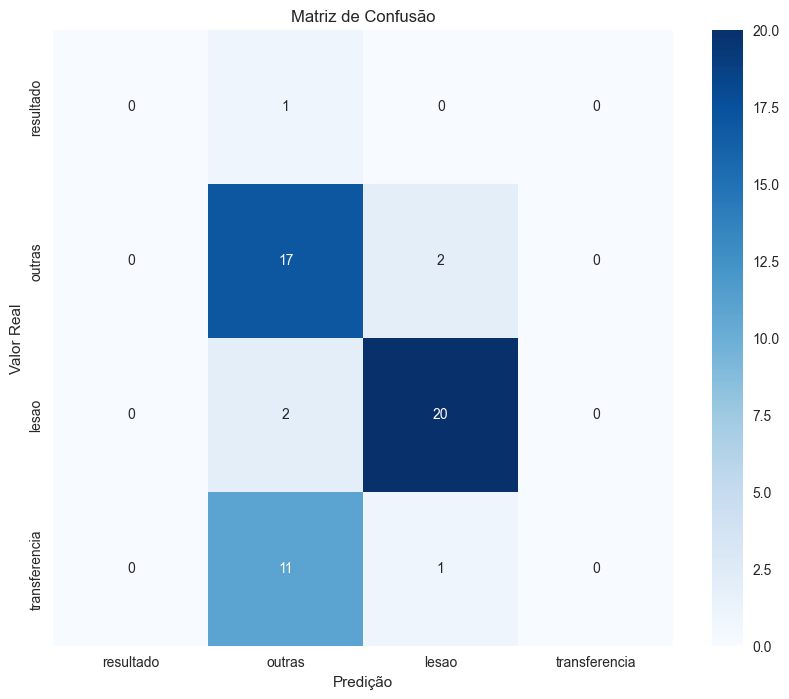

In [ ]:
test_texts = df['text'].values[-100:]  # Últimas 100 notícias para teste
test_labels = df['label'].values[-100:]
evaluate_model(model, tokenizer, test_texts, test_labels)

# **Referências**

Este é um item obrigatório. Inclua aqui o as referências, fontes, ou bibliografia e sites/bibliotecas que foram empregados para construir a sua proposta.

---

In [ ]:
#@title **Avaliação**
GitHub = 10 #@param {type:"slider", min:0, max:10, step:1}

Implementacao_Model_Code = 7 #@param {type:"slider", min:0, max:10, step:1}

Aplicacao_Streamlit = 9 #@param {type:"slider", min:0, max:10, step:1}

Texto_Artigo  = 6 #@param {type:"slider", min:0, max:10, step:1}

Video = 7 #@param {type:"slider", min:0, max:10, step:1}

Geral = 7 #@param {type:"slider", min:0, max:10, step:1}








In [ ]:
#@title **Nota Final**

nota = 2*GitHub + 4*Implementacao_Model_Code + 2*Aplicacao_Streamlit + 1*Texto_Artigo + 1*Video

nota = nota / 10

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.9



,tia,nome,nota
0,10223349,DANIEL REIS RASKE,7.9
1,10400734,EDUARDO MARUI DE CAMARGO,7.9
2,10403378,VICTOR VERGARA MARQUES DE OLIVEIRA,7.9
3,10204809,VITOR DOS SANTOS SOUZA,7.9
4,10402674,JOÃO VITOR TORTORELLO,7.9
